PRACTICA 1: Partiendo del fichero ventasGroucery_meses.xlsx, cargar los 3 dataframes de los meses de agosto a octubre 2014, realizar las modificaciones necesarias, después de anexar todos los dataframes en uno solo, al que llamaremos trimestre y resolveremos los siguientes enunciados.
1- Crear la columna amount = unit price * quantity
2- Crear la columna enterprise = "Delta enterprise"
3- Crear la columna discount = 3.35% sobre el amount, solo para los pedidos que sean de France o Germany.
4- Ver en un texto, la suma de discount ("El total de descuento es x")
5- Ver en un texto, el promedio de amount, de los pedidos cuya categoría = beverages ("El promedio de amount de beverages es x")
6- Ver en un texto, la suma de amount, de los pedidos de la categoría seafood cuya cantidad (quantity)esté comprendido entre 25-75 ("La suma de amount de seafood entre 25-75 es x")

In [1]:
import pandas as pd
#Guardar la ruta del fichero en una variable
fichero = r"C:\Users\geb_b\Downloads\VentasGroucery_Meses.xlsx"

agosto2014 = pd.read_excel(fichero, sheet_name="Ventas Agosto 2014")
#agosto2014
septiembre2014 = pd.read_excel(fichero, sheet_name="Ventas Septiembre 2014")   
#septiembre2014

octubre2014 = pd.read_excel (fichero, sheet_name="Ventas Octubre 2014") 
#octubre2014

#Anexar los 3 dataframes para obtener uno solo, con todos los registros
trimestre = pd.concat([agosto2014, septiembre2014, octubre2014], ignore_index=True)
print(trimestre)

#1Calcular la columna Amount
trimestre["Amount"] = trimestre["Unit Price"]*trimestre["Quantity"]
print(trimestre)                           

#2- Crear la columna enterprise = "Delta enterprise"
#trimestre["Enterprise"] = "Delta enterprise"
#trimestre

#3- Crear la columna discount = 3.35% sobre el amount, solo para los pedidos que sean de France o Germany.
#Crear una función para preguntar si el país es France o Germany para aplicar el 3.35% de descuento

# Definir la función para que me devuelva o 0.035 (para France o Germany) o 0(para cualquier otro país)
def descuento(pais):
    if (pais == "France") | (pais == "Germany"):
        return 0.0335
    else:
        return 0

# Así puedo calcular el descuento para el Amount 
trimestre["Discount"] = trimestre["Amount"]*trimestre["Ship Country"].apply(descuento)
print(trimestre)

#4- Ver en un texto, la suma de discount ("El total de descuento es x")
print("El total de descuento es", round(trimestre["Discount"].sum(),2))
#print(len(trimestre))

#5- Ver en un texto, el promedio de amount, de los pedidos cuya categoría = beverages ("El promedio 
# de amount de beverages es x")
#Crear el filtro para la categoría beverages, en este caso es trimestreBV
trimestreBV = trimestre["Category"] == "Beverages"
print("El promedio de amount de beverages es", round(trimestre[trimestreBV]["Amount"].mean(),2))

#6- Ver en un texto, la suma de amount, de los pedidos de la categoría seafood cuya cantidad (quantity)
# esté comprendido entre 25-75 ("La suma de amount de seafood entre 25-75 es x")
trimestreSeafood2575 = (trimestre["Quantity"] >=25)&(trimestre["Quantity"]<=75)&(trimestre["Category"]=="Seafood")
print("La suma de amount de seafood entre 25-75 es", round(trimestre[trimestreSeafood2575]["Amount"].sum(),2))

trimestre.info

     Order ID                          Product        Category  Unit Price  \
0       10248    Singaporean Hokkien Fried Mee  Grains/Cereals         9.8   
1       10248           Mozzarella di Giovanni  Dairy Products        34.8   
2       10248                   Queso Cabrales  Dairy Products        14.0   
3       10249                             Tofu         Produce        18.6   
4       10249            Manjimup Dried Apples         Produce        42.4   
..        ...                              ...             ...         ...   
180     10315                    Sasquatch Ale       Beverages        11.2   
181     10315                    Outback Lager       Beverages        12.0   
182     10316  Jack's New England Clam Chowder         Seafood         7.7   
183     10316                   Tarte au sucre     Confections        39.4   
184     10317                             Chai       Beverages        14.4   

     Quantity                    Customer    Ship City Ship Cou

<bound method DataFrame.info of      Order ID                          Product        Category  Unit Price  \
0       10248    Singaporean Hokkien Fried Mee  Grains/Cereals         9.8   
1       10248           Mozzarella di Giovanni  Dairy Products        34.8   
2       10248                   Queso Cabrales  Dairy Products        14.0   
3       10249                             Tofu         Produce        18.6   
4       10249            Manjimup Dried Apples         Produce        42.4   
..        ...                              ...             ...         ...   
180     10315                    Sasquatch Ale       Beverages        11.2   
181     10315                    Outback Lager       Beverages        12.0   
182     10316  Jack's New England Clam Chowder         Seafood         7.7   
183     10316                   Tarte au sucre     Confections        39.4   
184     10317                             Chai       Beverages        14.4   

     Quantity                  

El objeto iloc en pandas, me permite acceder a filas y columnas de un dataframe utilizando los índices numéricos(está basado en posiciones, iloc significa integer location)
esta es la sintaxis:
dataframe.iloc[fila, columna]
Acceso a una posición, acceso a un rango (slicing), negativos, desde el final

In [2]:
#es de lectura
print(trimestre.iloc[4,2])
#print(trimestre)
#Pero me permmite escritura
trimestre.iloc[1,1]="Sin producto"
#print(trimestre)

#Con iloc además me permite ordenar las columnas como me interese
#trimestre = trimestre.iloc[:,[2,6,5,4,0,1,7,9,8,3]]
trimestre = trimestre.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]] #También puedo volver a ordenar las columnas

print(trimestre)

Produce
     Order ID                          Product        Category  Unit Price  \
0       10248    Singaporean Hokkien Fried Mee  Grains/Cereals         9.8   
1       10248                     Sin producto  Dairy Products        34.8   
2       10248                   Queso Cabrales  Dairy Products        14.0   
3       10249                             Tofu         Produce        18.6   
4       10249            Manjimup Dried Apples         Produce        42.4   
..        ...                              ...             ...         ...   
180     10315                    Sasquatch Ale       Beverages        11.2   
181     10315                    Outback Lager       Beverages        12.0   
182     10316  Jack's New England Clam Chowder         Seafood         7.7   
183     10316                   Tarte au sucre     Confections        39.4   
184     10317                             Chai       Beverages        14.4   

     Quantity                    Customer    Ship City 

In [3]:
#Cómo averiguar el número de columnas de un dataframe, así veo el nombre de las columnas
print(trimestre.columns)

#Usaremos len para ver el número de columnas
len(trimestre.columns)

#Para averiguar el número de filas, usaremos len solo con el dataframe
len(trimestre)
trimestre.info()

Index(['Order ID', 'Product', 'Category', 'Unit Price', 'Quantity', 'Customer',
       'Ship City', 'Ship Country', 'Order Date', 'Amount', 'Discount'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      185 non-null    int64         
 1   Product       185 non-null    object        
 2   Category      185 non-null    object        
 3   Unit Price    185 non-null    float64       
 4   Quantity      185 non-null    int64         
 5   Customer      185 non-null    object        
 6   Ship City     185 non-null    object        
 7   Ship Country  185 non-null    object        
 8   Order Date    185 non-null    datetime64[ns]
 9   Amount        185 non-null    float64       
 10  Discount      185 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usag

In [4]:
#Vamos a recorrer un dataframe con un bucle for, lectura
filas = len(trimestre)
for i in range(0,filas):
    print(trimestre.iloc[i,1])

Singaporean Hokkien Fried Mee
Sin producto
Queso Cabrales
Tofu
Manjimup Dried Apples
Louisiana Fiery Hot Pepper Sauce
Jack's New England Clam Chowder
Manjimup Dried Apples
Louisiana Fiery Hot Pepper Sauce
Gustaf's Knäckebröd
Ravioli Angelo
Sir Rodney's Marmalade
Geitost
Camembert Pierrot
Maxilaku
Chartreuse verte
Gorgonzola Telino
Pâté chinois
Longlife Tofu
Guaraná Fantástica
Raclette Courdavault
Chang
Pavlova
Inlagd Sill
Perth Pasties
Original Frankfurter grüne Soße
Schoggi Schokolade
Chartreuse verte
Original Frankfurter grüne Soße
Chang
Chef Anton's Gumbo Mix
Mascarpone Fabioli
Sir Rodney's Scones
Gravad lax
Jack's New England Clam Chowder
Ravioli Angelo
Tarte au sucre
Outback Lager
Sir Rodney's Scones
Steeleye Stout
Chef Anton's Gumbo Mix
Uncle Bob's Organic Dried Pears
Gnocchi di nonna Alice
Pavlova
Guaraná Fantástica
Nord-Ost Matjeshering
Longlife Tofu
Chang
Jack's New England Clam Chowder
Alice Mutton
Outback Lager
Queso Manchego La Pastora
Boston Crab Meat
Raclette Courdavault


In [5]:
#Vamos a recorrer un dataframe con un bucle for, escritura
filas = len(trimestre)
for i in range(0,filas):
    if trimestre.iloc[i,7]=="Germany":
        trimestre.iloc[i,1]="Producto Alemania"
trimestre

,Order ID,Product,Category,Unit Price,Quantity,Customer,Ship City,Ship Country,Order Date,Amount,Discount
0,10248,Singaporean Hokkien Fried Mee,Grains/Cereals,9.8,1,Vins et alcools Chevalier,Reims,France,2014-08-04,9.8,0.3283
1,10248,Sin producto,Dairy Products,34.8,5,Vins et alcools Chevalier,Reims,France,2014-08-04,174.0,5.8290
2,10248,Queso Cabrales,Dairy Products,14.0,12,Vins et alcools Chevalier,Reims,France,2014-08-04,168.0,5.6280
3,10249,Producto Alemania,Produce,18.6,9,Toms Spezialitäten,Münster,Germany,2014-08-05,167.4,5.6079
4,10249,Producto Alemania,Produce,42.4,40,Toms Spezialitäten,Münster,Germany,2014-08-05,1696.0,56.8160
...,...,...,...,...,...,...,...,...,...,...,...
180,10315,Sasquatch Ale,Beverages,11.2,14,Island Trading,Cowes,UK,2014-10-27,156.8,0.0000
181,10315,Outback Lager,Beverages,12.0,30,Island Trading,Cowes,UK,2014-10-27,360.0,0.0000
182,10316,Jack's New England Clam Chowder,Seafood,7.7,10,Rattlesnake Canyon Grocery,Albuquerque,USA,2014-10-28,77.0,0.0000
183,10316,Tarte au sucre,Confections,39.4,70,Rattlesnake Canyon Grocery,Albuquerque,USA,2014-10-28,2758.0,0.0000


In [6]:
#Crear un dataframe (creo manualmente)
data = {"col1": [15,28,66,34],
        "col2": [10,20,30,40]}
df = pd.DataFrame(data)
df

#Crear otro dataframe (creo manualmente)
data = {"col3": [15,28,66,34],
        "col4": [10,20,30,40]}
df2 = pd.DataFrame(data)
df2

#Antes de anexar debo comprobar y cambiar los nombres de las columnas, opción A:
#df2 = df2.rename(columns={"col3":"col1", "col4":"col2"})
#df2

#Opción fast & furious (esto es más fácil)
df2.columns = df.columns

#Anexar los dos dataframes df + df2 con nombres de columnas diferentes
#No puedo anexar porque las columnas no tienen el mismo nombre
resultado = pd.concat([df,df2])
resultado

,col1,col2
0,15,10
1,28,20
2,66,30
3,34,40
0,15,10
1,28,20
2,66,30
3,34,40


PRACTICA 2: aprovechando el dataframe trimestre vamos a decargar de GitHub el fichero VentasGroucery Nov-Dic.xlsx, calcular el amount en nov-dic antes de anexar el dataframe trimestre con los meses de noviembre y diciembre, le llamaremos trimestre2, cambiar el orden de las columnas, para ver la última la primera (modo espejo). Mediante un bucle for recorrer todos los registros del trimestre2 y modificar el campo discount, calcularemos un 2.75% sobre amount, si el amount es > 250 y no tenga descuento por ser de France o Germany. Ver los primero 20 registros del dataframe trimestre2.

In [7]:
import pandas as pd
#Guardar la ruta del fichero en una variable
fichero2 = r"C:\Users\geb_b\Downloads\VentasGroucery Nov-Dic.xlsx"

noviembre2014 = pd.read_excel(fichero2, sheet_name="Ventas Noviembre 2014")
diciembre2014 = pd.read_excel(fichero2, sheet_name="Ventas Diciembre 2014")
print(noviembre2014)
print("--------------------------")
print(diciembre2014)
#información del dataframe
noviembre2014.info()
diciembre2014.info()
trimestre.info()

#también puedo anexar noviembre2014 y diciembre2014 al dataframe antes de calcular el amount
bimensual = pd.concat([noviembre2014, diciembre2014], ignore_index=True)
bimensual

#Calcular la columna Amount del dataframe bimensual
bimensual["Amount"] = bimensual["Precio Unidad"]*bimensual["Cantidad"]
bimensual

#calcular el discount del dataframe bimensual
bimensual["Discount"] = bimensual["Amount"]*bimensual["País"].apply(descuento)
bimensual

#Cambiar el nonombre de las columnas del dataframe bimensual (Noviembre y Diciembre)
bimensual.columns = trimestre.columns

#Anexar los 3 dataframes para obtener uno solo, con todos los registros
trimestre2 = pd.concat([trimestre,bimensual], ignore_index=True)
trimestre2

#Cambiar el orden de las columnas, modo espejo (para ver la última columna en primer lugar)
trimestre2 = trimestre2.iloc[:,[10,9,8,7,6,5,4,3,2,1,0]]
trimestre2

#Mediante un bucle for recorrer todos los registros del trimestre2 y modificar el 
# campo discount, calcularemos un 2.75% sobre amount, si el amount es > 250 y no tenga descuento 
# por ser de France o Germany
# Verificar que las columnas "Amount" y "Discount" existen
filas = len(trimestre2)
for i in range(0,filas):
    if(trimestre2.iloc[i,1]>250) & (trimestre2.iloc[i,0]==0):
        #A modificar el campo discount, ínidce 0
        trimestre2.iloc[i,0]=trimestre2.iloc[i,1]*0.0275

#ver los 20 primeros (en principio va por índice)
trimestre2.head(20)

    IdPedido                Producto       Categoría  Precio Unidad  Cantidad  \
0      10270             Ipoh Coffee       Beverages           36.8        25   
1      10270             Inlagd Sill         Seafood           15.2        30   
2      10271                 Geitost  Dairy Products            2.0        24   
3      10272  Sir Rodney's Marmalade     Confections           64.8         6   
4      10272       Gorgonzola Telino  Dairy Products           10.0        40   
..       ...                     ...             ...            ...       ...   
64     10294       Camembert Pierrot  Dairy Products           27.2        21   
65     10294    Rhönbräu Klosterbier       Beverages            6.2         6   
66     10294             Ipoh Coffee       Beverages           36.8        15   
67     10294            Alice Mutton    Meat/Poultry           31.2        15   
68     10294                    Chai       Beverages           14.4        18   

                       Clie

,Discount,Amount,Order Date,Ship Country,Ship City,Customer,Quantity,Unit Price,Category,Product,Order ID
0,0.3283,9.8,2014-08-04,France,Reims,Vins et alcools Chevalier,1,9.8,Grains/Cereals,Singaporean Hokkien Fried Mee,10248
1,5.8290,174.0,2014-08-04,France,Reims,Vins et alcools Chevalier,5,34.8,Dairy Products,Sin producto,10248
2,5.6280,168.0,2014-08-04,France,Reims,Vins et alcools Chevalier,12,14.0,Dairy Products,Queso Cabrales,10248
3,5.6079,167.4,2014-08-05,Germany,Münster,Toms Spezialitäten,9,18.6,Produce,Producto Alemania,10249
4,56.8160,1696.0,2014-08-05,Germany,Münster,Toms Spezialitäten,40,42.4,Produce,Producto Alemania,10249
5,6.9300,252.0,2014-08-08,Brazil,Rio de Janeiro,Hanari Carnes,15,16.8,Condiments,Louisiana Fiery Hot Pepper Sauce,10250
6,0.0000,77.0,2014-08-08,Brazil,Rio de Janeiro,Hanari Carnes,10,7.7,Seafood,Jack's New England Clam Chowder,10250
7,40.8100,1484.0,2014-08-08,Brazil,Rio de Janeiro,Hanari Carnes,35,42.4,Produce,Manjimup Dried Apples,10250
8,11.2560,336.0,2014-08-08,France,Lyon,Victuailles en stock,20,16.8,Condiments,Louisiana Fiery Hot Pepper Sauce,10251
9,3.3768,100.8,2014-08-08,France,Lyon,Victuailles en stock,6,16.8,Grains/Cereals,Gustaf's Knäckebröd,10251


Clase 6

In [8]:
#Como ver la agrupación de un dataframe, mediante la función groupby
trimestre2.groupby(["Category"]).Amount.sum()
#Una cosa es la dimensión (todo aquello por lo que queremmos medir, zona, familia...)
#La métrica la medición de la información. suma, el promedio, max, min, cantidad...
trimestre2.groupby(["Ship Country", "Category"]).Amount.sum()
#Crear un dataframe para guardar el resultado de una agrupación
trimestre2agrup =trimestre2.groupby(["Category"]).Amount.sum() #esto todavía no es un dataframe
#ahora sí es un dataframe
trimestre2agrup = pd.DataFrame(trimestre2agrup, columns=["Amount"])
#Convertir el category en un campo, generando los índices del dataframe
#con reset_index
trimestre2agrup = trimestre2agrup.reset_index()
trimestre2agrup

,Category,Amount
0,Beverages,23678.8
1,Condiments,11043.2
2,Confections,28385.9
3,Dairy Products,26430.8
4,Grains/Cereals,2816.4
5,Meat/Poultry,18682.3
6,Produce,7766.6
7,Seafood,18764.1


In [9]:
#Guardar un dataframe en un fichero, con to_csv + la ruta de windows, indicarlo con coma "," índice
#r"C:\Users\geb_b\Downloads\
#fichero3 = r"C:\Users\geb_b\Downloads\Category Amount.csv" Se puede hacer ruta + fichero en una variable, o por separado como abajo
ruta = r"C:\Users\geb_b\Downloads"
fichero3 = r"\Category Amount.csv"
trimestre2agrup.to_csv(ruta+fichero3,sep=",",index=True)
#Guardar un dataframe en un fichero excel , con to_excel + la ruta de windows, indicarle el nombre de la hoja, índice
#r"C:\Users\geb_b\Downloads\
fichero4 = r"\Category Amount.xlsx"
trimestre2agrup.to_excel(ruta+fichero4,sheet_name="Hola 1",header=True,index=False)


In [10]:
#Gráficos en Python, librerias matplotlib (la más usada) y seaborn
#(gráficos de alta calidad), primero instalar la librería
!pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


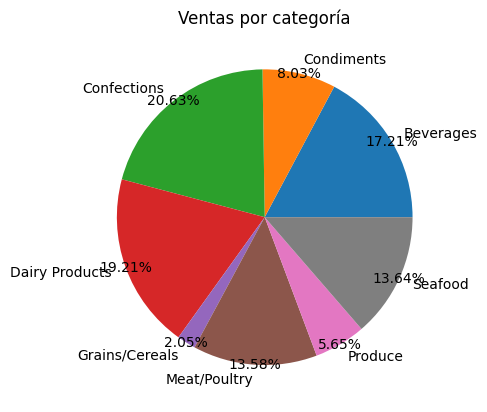

In [11]:
#Llamar a la clase pyplot de la librería matplotlib
import matplotlib.pyplot as plt
#Primero tengo que crear una figura, reservar espacio en el kernel
fig, maria = plt.subplots() #con esto estoy reservando espacio en el kernel
#El gráfico circular (de quesitos), es el gráfico pie, el primer parámetro es la métrica, 
# y las dimensiones van en el label, como ver el porcentaje % con autopct
maria.pie(trimestre2agrup["Amount"], labels=trimestre2agrup["Category"],autopct="%.2f%%", pctdistance=1, labeldistance=1.1)
#para poner un título al gráfico
maria.set_title("Ventas por categoría")
plt.show()

PRACTICA 1: En un fichero nuevo de visual code .ipynb.
Primero guardar el dataframe trimestre2, guardar un fichero .xslx solamente de los pedidos cuya categoría sea Seafood o Beverages, poner nombre de hoja "Pedidos A". Y después leer el nuevo fichero de visual.
Crear un dataframe que contenga el promedio de Amount - Discount agrupado por Ship Country. Guardar este fichero en formato csv separado por comas.
Crear un gráfico de quesitos para ver el % de promedio por Ship Country poner como título al gráfico "Promedio de Ventas por país"

In [12]:
#hacer el filtro
trimestre2Filtro =(trimestre2["Category"]=="Beverages") | (trimestre2["Category"]=="Seafood")
guardar = trimestre2[trimestre2Filtro]
#guardar en un excel
fichero5 = r"\Practica 1.xlsx"
guardar.to_excel(ruta+fichero5,sheet_name="Pedidos A",header=True,index=False)

In [13]:
#esto es lo mio

#como filtrar por categoría seeafood y beverages
#trimestre_filtro = trimestre2[(trimestre2["Category"]=="Seafood") | (trimestre2["Category"]=="Beverages")]
#como crear un dataframe con la agrupación de la categoría
#trimestre_filtro_agrup = trimestre_filtro.groupby(["Category"]).Amount.sum()
#trimestre_filtro_agrup
#crear un fichero excel con el dataframe agrupado
#fichero4 = r"\Category Amount Filtro.xlsx"
#ruta = r"C:\Users\geb_b\Downloads"
#trimestre_filtro_agrup.to_excel(ruta + fichero4, sheet_name="Pedidos A")"""